In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from io import StringIO
import sys

<h2>Reading and exploring the datasets</h2>
<h5>The data set is too large so start by exploring the smaller datasets.</h5>


<h3>1. Qualifying dataset </h3>

In [2]:
path_to_qualifying = 'C:/Users/Kiran/Desktop/Pending/week11/BA/netflix-prize-data/qualifying.txt'
file = open(path_to_qualifying)
string_io = StringIO()
qualifying_dict = {}
for line in file:
    if(':' in line):
        movie_id = line.replace(':','').strip()
        subdict = {}
    else:
        cutomer_id, date_id = line.split(',')
        subdict[cutomer_id] = date_id.strip()
        qualifying_dict[movie_id] = subdict


In [3]:
#the values to be considered as validation data set
qualifying_dict

{'1': {'1037634': '2005-12-02',
  '1046323': '2005-12-19',
  '1057066': '2005-11-07',
  '1080030': '2005-12-23',
  '1086137': '2005-09-21',
  '1098297': '2005-09-07',
  '1120771': '2005-12-23',
  '1148248': '2005-06-28',
  '122249': '2005-08-07',
  '1225745': '2005-09-21',
  '1286101': '2005-03-11',
  '131974': '2005-12-15',
  '1335251': '2005-11-22',
  '1375137': '2005-11-14',
  '1414572': '2005-12-19',
  '1500833': '2005-08-26',
  '1635114': '2005-06-06',
  '1687310': '2005-09-30',
  '1699738': '2005-12-17',
  '1830096': '2005-03-14',
  '1834684': '2004-11-16',
  '1907534': '2005-12-24',
  '1944918': '2005-10-05',
  '1968531': '2005-11-26',
  '1986275': '2005-01-22',
  '2004689': '2005-12-13',
  '2043236': '2005-10-31',
  '2072389': '2004-09-17',
  '2112862': '2004-12-02',
  '2124885': '2005-11-03',
  '2127527': '2005-12-04',
  '2168239': '2005-11-26',
  '2169348': '2005-12-01',
  '2258923': '2005-09-19',
  '2288690': '2005-12-27',
  '2370218': '2005-10-28',
  '2443637': '2005-12-20'

<h3>2. Movie DataSet</h3>

In [4]:
#gladly this data is in a good format
movie_title_data = pd.read_csv('C:/Users/Kiran/Desktop/Pending/week11/BA/netflix-prize-data/movie_titles.csv', header = None,
                              names = ['Year_Of_Release', 'Movie_title'], usecols = [1, 2], encoding = 'Latin')
movie_title_data.tail()

,Year_Of_Release,Movie_title
17765,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,2004.0,Fidel Castro: American Experience
17767,2000.0,Epoch
17768,2003.0,The Company
17769,2003.0,Alien Hunter


In [5]:
#convert the float data into int values of years
# movie_title_data['Year_Of_Release'] = movie_title_data['Year_Of_Release'].astype(int)
# movie_title_data.head()

#some of the year values are null so unable to convert to int

<h3>3. Probe File</h3>

In [6]:
#def a function to read data in the qualifying dataset format
def read_data(path_to_file):
    file = open(path_to_file)
    string_io = StringIO()
    data_dict = {}
    for line in file:
        if(':' in line):
            movie_id = line.replace(':','').strip()
            sublist = []
        else:
            sublist.append(line.strip())
            data_dict[movie_id] = sublist
    return data_dict


In [7]:
probe_dict = read_data('C:/Users/Kiran/Desktop/Pending/week11/BA/netflix-prize-data/probe.txt')

In [8]:
probe_dict['1']

['30878',
 '2647871',
 '1283744',
 '2488120',
 '317050',
 '1904905',
 '1989766',
 '14756',
 '1027056',
 '1149588',
 '1394012',
 '1406595',
 '2529547',
 '1682104',
 '2625019',
 '2603381',
 '1774623',
 '470861',
 '712610',
 '1772839',
 '1059319',
 '2380848',
 '548064']

<h3>4. Combined Data load</h3>

In [9]:
def read_combined_data(path_to_file):
    file = open(path_to_file)
    string_io = StringIO()
    data_list = []
    movie_id_list = []
    i = 0
    for line in file:
        i = i + 1
        if(':' in line):
            movie_id = line.strip().replace(':', '')
            movie_id_list.append(movie_id)
        else:
            customer_id, rating, date = line.split(',')
            data_list.append([movie_id.strip(), customer_id.strip(), rating.strip(), date.strip()])
    return data_list, movie_id_list

<h3>CAUTION!! .. following step takes a long time to execute</h3>

In [10]:
combined_data = read_combined_data('C:/Users/Kiran/Desktop/Pending/week11/BA/netflix-prize-data/combined_data_1.txt')

In [11]:
df_list = combined_data[0].copy()
movie_id_list = combined_data[1].copy()

<h3>CAUTION!! .. following step takes a long time to execute</h3>

In [12]:
df = pd.DataFrame(df_list)
df.head()

,0,1,2,3
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [13]:
df.columns = ["movie_id", "customer_id", "rating", "date"]

In [14]:
df.head()

,movie_id,customer_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


<h5>Now that all the tables are in place. Need to remove the prob data from the dataset.</h5>

<h3>Data Cleansing </h3>
<h5>Remove the prob data from the initial data</h5>

<h5>Just not possible to run the entire data in this laptop.</h5>

In [65]:
df['rating']  = pd.to_numeric(df['rating'])
df['movie_id']  = pd.to_numeric(df['movie_id'])
# d  = pd.to_numeric(df['movie_id'])

In [66]:
df_movie1 = df[df.movie_id <= 6].copy()

In [67]:
df_movie1.shape

(5005, 4)

In [81]:
#remove these 23 values from the dataset
validation_list = []
for j in range(7):
    cust_list = probe_dict[str(j+1)]
    n = len(cust_list)
    for i in range(n):
        
        validation_list.append(df_movie1[(df_movie1.customer_id == cust_list[i]) & (df_movie1.movie_id == j+1)].values.ravel().tolist())
        

In [82]:
validation_list

[[1, '30878', 4, '2005-12-26'],
 [1, '2647871', 4, '2005-12-30'],
 [1, '1283744', 3, '2004-04-17'],
 [1, '2488120', 5, '2005-09-20'],
 [1, '317050', 5, '2005-11-15'],
 [1, '1904905', 4, '2005-05-13'],
 [1, '1989766', 4, '2005-07-08'],
 [1, '14756', 4, '2005-12-27'],
 [1, '1027056', 3, '2005-12-03'],
 [1, '1149588', 4, '2005-12-13'],
 [1, '1394012', 5, '2005-12-19'],
 [1, '1406595', 4, '2005-08-27'],
 [1, '2529547', 5, '2005-11-18'],
 [1, '1682104', 4, '2005-08-30'],
 [1, '2625019', 3, '2005-09-12'],
 [1, '2603381', 5, '2005-11-29'],
 [1, '1774623', 4, '2005-11-23'],
 [1, '470861', 5, '2004-06-28'],
 [1, '712610', 4, '2005-04-27'],
 [1, '1772839', 5, '2005-09-19'],
 [1, '1059319', 3, '2005-10-10'],
 [1, '2380848', 5, '2005-01-11'],
 [1, '548064', 5, '2005-12-02'],
 [2, '1959936', 5, '2005-11-21'],
 [2, '748922', 5, '2005-07-05'],
 [2, '1131325', 2, '2005-11-14'],
 [2, '1312846', 3, '2005-08-26'],
 [2, '2314531', 4, '2005-07-15'],
 [2, '1636093', 5, '2005-10-20'],
 [2, '584750', 3, '2005

In [83]:
validation_list = list(filter(None, validation_list))
validation_list

[[1, '30878', 4, '2005-12-26'],
 [1, '2647871', 4, '2005-12-30'],
 [1, '1283744', 3, '2004-04-17'],
 [1, '2488120', 5, '2005-09-20'],
 [1, '317050', 5, '2005-11-15'],
 [1, '1904905', 4, '2005-05-13'],
 [1, '1989766', 4, '2005-07-08'],
 [1, '14756', 4, '2005-12-27'],
 [1, '1027056', 3, '2005-12-03'],
 [1, '1149588', 4, '2005-12-13'],
 [1, '1394012', 5, '2005-12-19'],
 [1, '1406595', 4, '2005-08-27'],
 [1, '2529547', 5, '2005-11-18'],
 [1, '1682104', 4, '2005-08-30'],
 [1, '2625019', 3, '2005-09-12'],
 [1, '2603381', 5, '2005-11-29'],
 [1, '1774623', 4, '2005-11-23'],
 [1, '470861', 5, '2004-06-28'],
 [1, '712610', 4, '2005-04-27'],
 [1, '1772839', 5, '2005-09-19'],
 [1, '1059319', 3, '2005-10-10'],
 [1, '2380848', 5, '2005-01-11'],
 [1, '548064', 5, '2005-12-02'],
 [2, '1959936', 5, '2005-11-21'],
 [2, '748922', 5, '2005-07-05'],
 [2, '1131325', 2, '2005-11-14'],
 [2, '1312846', 3, '2005-08-26'],
 [2, '2314531', 4, '2005-07-15'],
 [2, '1636093', 5, '2005-10-20'],
 [2, '584750', 3, '2005

In [84]:
validation_df = pd.DataFrame(validation_list)
validation_df.columns = ["movie_id", "customer_id", "rating", "date"]

In [85]:
validation_df.head()

,movie_id,customer_id,rating,date
0,1,30878,4,2005-12-26
1,1,2647871,4,2005-12-30
2,1,1283744,3,2004-04-17
3,1,2488120,5,2005-09-20
4,1,317050,5,2005-11-15


In [166]:
training_df = pd.merge(df_movie1, validation_df, how='outer', on = 'customer_id', indicator=True)


In [167]:
training_df.head()

,movie_id_x,customer_id,rating_x,date_x,movie_id_y,rating_y,date_y,_merge
0,1,1488844,3,2005-09-06,NaN,NaN,NaN,left_only
1,1,822109,5,2005-05-13,NaN,NaN,NaN,left_only
2,1,885013,4,2005-10-19,NaN,NaN,NaN,left_only
3,5,885013,5,2005-05-15,NaN,NaN,NaN,left_only
4,1,30878,4,2005-12-26,1.0,4.0,2005-12-26,both


In [168]:
training_df = training_df[training_df['_merge'] != 'both']

In [169]:
training_df.head()

,movie_id_x,customer_id,rating_x,date_x,movie_id_y,rating_y,date_y,_merge
0,1,1488844,3,2005-09-06,NaN,NaN,NaN,left_only
1,1,822109,5,2005-05-13,NaN,NaN,NaN,left_only
2,1,885013,4,2005-10-19,NaN,NaN,NaN,left_only
3,5,885013,5,2005-05-15,NaN,NaN,NaN,left_only
6,1,823519,3,2004-05-03,NaN,NaN,NaN,left_only


In [170]:
training_df.drop(['movie_id_y', 'rating_y', 'date_y', '_merge'], axis = 1, inplace = True)


In [171]:
training_df.columns = ["movie_id", "customer_id", "rating", "date"]

In [172]:
training_df.head()

,movie_id,customer_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,5,885013,5,2005-05-15
6,1,823519,3,2004-05-03


<h3>Creating the Rating Matrix</h3>

In [61]:
#convert data into numeric
df_movie1['rating']  = pd.to_numeric(df_movie1['rating'])

In [173]:
ratings_matrix = training_df.pivot_table(index=['movie_id'],columns=['customer_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head()

customer_id,100006,100029,1001461,1001701,1001775,1001779,1003773,1004395,1005769,1007254,...,994829,994993,995594,996349,997543,997632,998236,998862,999312,999444
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2,3.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,...,0.0,5.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0


<h3>Matrix Factorization to P, Q</h3>

In [174]:
train_data = ratings_matrix.as_matrix()


In [175]:
np.random.seed(100)

In [176]:
def learn_latent_factors(train_data, lambdas, alpha, noe, ks):
    n = train_data.shape[0]
    m = train_data.shape[1]
    P = np.random.rand(n, ks)
    Q = np.random.rand(ks, m)
    error_list = []
    prev_rmse = 100000
    for no in range(noe):
        e = 0
        for i in range(n):
            for j in range(m):
                if(train_data[i][j] > 0):
                    error = train_data[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(ks):
                        P[i][k] = P[i][k] + alpha * (2 * error * Q[k][j] - lambdas * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * error * P[i][k] - lambdas * Q[k][j])
        error_new = np.dot(P, Q)
        for i in range(n):
            for j in range(m):
                e = e + pow(train_data[i][j] - np.dot(P[i,:],Q[:,j]), 2)
        rmse = np.sqrt(e/(m*n))
        error_list.append(rmse)
        if(rmse > prev_rmse):
            break
        prev_rmse = rmse
    return P, Q, error_list

In [177]:
lambdas = 0
alpha = 1e-5
noe = 20
ks = 2
P, Q, error_list= learn_latent_factors(train_data, lambdas, alpha, noe, ks)

In [178]:
P

array([[ 0.7943412 ,  0.53513102],
       [ 0.48792528,  0.89811568],
       [ 0.96375742,  1.05754692],
       [ 0.7153994 ,  0.86733526],
       [ 0.66633346,  1.09880644],
       [ 1.22570649,  0.57309836]])

In [179]:
Q

array([[ 0.1857164 ,  0.10910878,  0.22006854, ...,  0.84521801,
         0.07438313,  0.1296082 ],
       [ 0.50020229,  0.27280309,  0.61878881, ...,  0.53323814,
         0.85202855,  0.12650496]])

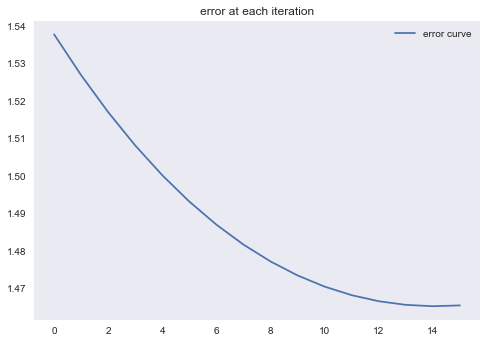

In [180]:
plt.plot(error_list, label = 'error curve')
plt.grid()
plt.title('error at each iteration')
plt.legend()
plt.show()

<h3>hyper parameter tuning in MF model</h3>

In [181]:
def grid_search(lambdass, alphas, ks):
    parameter_list = []
    error_grid_list  = []
    for k in ks:
        for lambdas in lambdass:
            for alpha in alphas:
                parameter_list.append(str('k = '+str(k)+' lambda = '+str(lambdas)+' alpha = '+str(alpha)))
                P, Q, error_list= learn_latent_factors(train_data, lambdas, alpha, 20, k)
                error_grid_list.append(min(error_list))
    arg_min = np.argmin(error_grid_list)
    return arg_min, error_grid_list, parameter_list
                

In [182]:
lambdass = [0, 0.5, 1, 2]
alphas = [1e-4, 1e-5, 1e-6, 1e-7]
ks = [2, 3, 4]
arg_min, error_grid_list, parameter_list = grid_search(lambdass, alphas, ks)

In [183]:
error_grid_list[arg_min]

1.4037312386733922

In [184]:
parameter_list[arg_min]

'k = 3 lambda = 1 alpha = 1e-05'

In [185]:
lambdas = 1
alpha = 1e-05
noe = 20
ks = 3
P, Q, error_list= learn_latent_factors(train_data, lambdas, alpha, noe, ks)

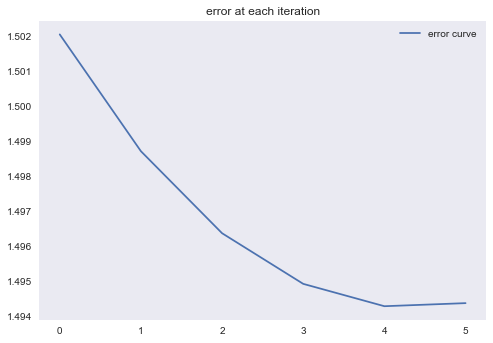

In [186]:
plt.plot(error_list, label = 'error curve')
plt.grid()
plt.title('error at each iteration')
plt.legend()
plt.show()

<h3>Accuracy on the validation set</h3>

In [187]:
ratings_matrix_val = validation_df.pivot_table(index=['movie_id'],columns=['customer_id'],values='rating').reset_index(drop=True)
ratings_matrix_val.fillna( 0, inplace = True )
ratings_matrix_val.head()

customer_id,1005654,100750,1027056,1043428,1059319,1063699,1064641,1117357,1118398,1128196,...,789965,793852,81979,823979,927276,942444,94660,952944,959168,966156
0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,...,4.0,0.0,5.0,0.0,5.0,0.0,0.0,3.0,3.0,5.0


In [188]:
val = ratings_matrix_val.as_matrix()

In [191]:
e = 0    
n = val.shape[0]
m = val.shape[1]
for i in range(n):
    for j in range(m):
        e = e + pow(val[i][j] - np.dot(P[i,:],Q[:,j]), 2)
rmse = np.sqrt(e/(m*n))
rmse

1.5936721866807761